In [1]:
import copy
import numpy as np
import pfea.solver as ksolver

import matplotlib.pyplot as plt


In [2]:
Be = np.zeros((9,6))
Be[0][0] = 1.0
Be[4][1] = 1.0
Be[8][2] = 1.0
Be[1][3] = 0.5
Be[2][5] = 0.5
Be[3][3] = 0.5
Be[5][4] = 0.5
Be[6][5] = 0.5
Be[7][4] = 0.5

Be

array([[ 1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0.5,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0.5],
       [ 0. ,  0. ,  0. ,  0.5,  0. ,  0. ],
       [ 0. ,  1. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0.5,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0.5],
       [ 0. ,  0. ,  0. ,  0. ,  0.5,  0. ],
       [ 0. ,  0. ,  1. ,  0. ,  0. ,  0. ]])

There are 12 independent nodes in the kelvin lattice unit cell, and 24 nodes in total.

$$
\textbf{d} = 
\begin{bmatrix}
    \textbf{d}_1    \\ \textbf{d}_2    \\ \textbf{d}_3    \\ \textbf{d}_4 \\ 
    \textbf{d}_5    \\ \textbf{d}_6    \\ \textbf{d}_7    \\ \textbf{d}_8 \\ 
    \textbf{d}_9    \\ \textbf{d}_{10} \\ \textbf{d}_{11} \\ \textbf{d}_{12}\\
    \textbf{d}_{13} \\ \textbf{d}_{14} \\ \textbf{d}_{15} \\ \textbf{d}_{16}\\
    \textbf{d}_{17} \\ \textbf{d}_{18} \\ \textbf{d}_{19} \\ \textbf{d}_{20}\\
    \textbf{d}_{21} \\ \textbf{d}_{22} \\ \textbf{d}_{23} \\ \textbf{d}_{24}
\end{bmatrix}\,\,
\textbf{B}_0 = 
\begin{bmatrix}
\textbf{I} & \textbf{0} & \textbf{0} & \textbf{0} &
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} &
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} 
\\
\textbf{0} & \textbf{I} & \textbf{0} & \textbf{0} &
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} &
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} 
\\
\textbf{0} & \textbf{0} & \textbf{I} & \textbf{0} &
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} &
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} 
\\
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{I} &
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} &
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} 
\\
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} &
\textbf{I} & \textbf{0} & \textbf{0} & \textbf{0} &
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} 
\\
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} &
\textbf{0} & \textbf{I} & \textbf{0} & \textbf{0} &
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} 
\\
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} &
\textbf{0} & \textbf{I} & \textbf{0} & \textbf{0} &
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} 
\\
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} &
\textbf{I} & \textbf{0} & \textbf{0} & \textbf{0} &
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} 
\\
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} &
\textbf{0} & \textbf{0} & \textbf{I} & \textbf{0} &
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} 
\\
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} &
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{I} &
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} 
\\
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} &
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} &
\textbf{I} & \textbf{0} & \textbf{0} & \textbf{0} 
\\
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} &
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} &
\textbf{I} & \textbf{0} & \textbf{0} & \textbf{0} 
\\
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} &
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} &
\textbf{0} & \textbf{I} & \textbf{0} & \textbf{0} 
\\
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} &
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} &
\textbf{0} & \textbf{I} & \textbf{0} & \textbf{0} 
\\
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} &
\textbf{0} & \textbf{0} & \textbf{I} & \textbf{0} &
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} 
\\
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} &
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{I} &
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} 
\\
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} &
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} &
\textbf{0} & \textbf{0} & \textbf{I} & \textbf{0} 
\\
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} &
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} &
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{I} 
\\
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} &
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} &
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{I} 
\\
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} &
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} &
\textbf{0} & \textbf{0} & \textbf{I} & \textbf{0} 
\\
\textbf{I} & \textbf{0} & \textbf{0} & \textbf{0} &
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} &
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} 
\\
\textbf{0} & \textbf{I} & \textbf{0} & \textbf{0} &
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} &
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} 
\\
\textbf{0} & \textbf{0} & \textbf{I} & \textbf{0} &
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} &
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} 
\\
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{I} &
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} &
\textbf{0} & \textbf{0} & \textbf{0} & \textbf{0} 
\end{bmatrix}\,\,
\textbf{d}_0 = 
\begin{bmatrix}
    \textbf{d}_1    \\ \textbf{d}_2    \\ \textbf{d}_3    \\ \textbf{d}_4    \\ 
    \textbf{d}_5    \\ \textbf{d}_6    \\ \textbf{d}_9    \\ \textbf{d}_{10} \\ 
    \textbf{d}_{11} \\ \textbf{d}_{13} \\ \textbf{d}_{17} \\ \textbf{d}_{18} \\ 
\end{bmatrix}
$$

And

$$
\textbf{B}_a = \begin{bmatrix}
\textbf{0}   & \textbf{0}   & \textbf{0} \\
\textbf{0}   & \textbf{0}   & \textbf{0} \\
\textbf{0}   & \textbf{0}   & \textbf{0} \\
\textbf{0}   & \textbf{0}   & \textbf{0} \\
\textbf{0}   & \textbf{0}   & \textbf{0} \\
\textbf{0}   & \textbf{0}   & \textbf{0} \\
\textbf{0}   & \textbf{0}   & \textbf{I}_t\\
\textbf{0}   & \textbf{I}_t & \textbf{0} \\
\textbf{0}   & \textbf{0}   & \textbf{0} \\
\textbf{0}   & \textbf{0}   & \textbf{0} \\
\textbf{0}   & \textbf{0}   & \textbf{0} \\
\textbf{0}   & \textbf{0}   & \textbf{I}_t\\
\textbf{0}   & \textbf{0}   & \textbf{0} \\
\textbf{0}   & \textbf{0}   & \textbf{I}_t\\
\textbf{0}   & \textbf{I}_t & \textbf{0} \\
\textbf{0}   & \textbf{I}_t & \textbf{0} \\
\textbf{0}   & \textbf{0}   & \textbf{0} \\
\textbf{0}   & \textbf{0}   & \textbf{0} \\
\textbf{0}   & \textbf{0}   & \textbf{I}_t \\
\textbf{0}   & \textbf{I}_t & \textbf{0} \\
\textbf{I}_t & \textbf{0}   & \textbf{0} \\
\textbf{I}_t & \textbf{0}   & \textbf{0} \\
\textbf{I}_t & \textbf{0}   & \textbf{0} \\
\textbf{I}_t & \textbf{0}   & \textbf{0} \\
\end{bmatrix}\,\,
\vec{\Delta a} = 
\begin{bmatrix}
\vec{\Delta a_1} \\ \vec{\Delta a_2} \\ \vec{\Delta a_3}
\end{bmatrix}
$$

In [3]:
kel_B_0_coords = [ 0, 1, 2, 3, 4, 5, 5, 4, 6, 7, 8, 8, 9, 9, 6, 7,10,11,11,10, 0, 1, 2, 3]
kel_B_a_coords = [[],[],[],[],[],[],[2],[1],[],[],[],[2],[],[2],[1],[1],[],[],[2],[1],[0],[0],[0],[0]]

kel_B_0 = np.zeros((144,72))

for row,col in enumerate(kel_B_0_coords):
    for i in range(6):
        kel_B_0[row*6+i][col*6+i] = 1.0

kel_B_a = np.zeros((144,9))

for row,cols in enumerate(kel_B_a_coords):
    for col in cols:
        for i in range(3):
            kel_B_a[row*6+i][col*3+i] = 1.0
            
psch_B_0_coords = [ 0, 1, 2, 3, 4, 5, 6, 7, 7, 8, 9, 4,10,11,12,12,13,13,10,11,14,15,16,17,17,18,19,14, 0, 1, 2, 3]

psch_B_a_coords = [[],[],[],[],[],[],[],[],
                  [2],[],[],[1],[],[],[],[2],
                  [],[2],[1],[1],[],[],[],[],
                  [2],[],[],[1],[0],[0],[0],[0]]

psch_B_0 = np.zeros((192,120))

for row,col in enumerate(psch_B_0_coords):
    for i in range(6):
        psch_B_0[row*6+i][col*6+i] = 1.0

psch_B_a = np.zeros((192,9))

for row,cols in enumerate(psch_B_a_coords):
    for col in cols:
        for i in range(3):
            psch_B_a[row*6+i][col*3+i] = 1.0
            
B_0_sets = [kel_B_0,psch_B_0]
B_a_sets = [kel_B_a,psch_B_a]

In [4]:
#14 nodes in total
kel_nodes = [[0.00,0.25,0.50],[0.00,0.50,0.25],[0.00,0.50,0.75],[0.00,0.75,0.50],
             [0.25,0.00,0.50],[0.25,0.50,0.00],[0.25,0.50,1.00],[0.25,1.00,0.50],
             [0.50,0.00,0.25],[0.50,0.00,0.75],[0.50,0.25,0.00],[0.50,0.25,1.00],
             [0.50,0.75,0.00],[0.50,0.75,1.00],[0.50,1.00,0.25],[0.50,1.00,0.75],
             [0.75,0.00,0.50],[0.75,0.50,0.00],[0.75,0.50,1.00],[0.75,1.00,0.50],
             [1.00,0.25,0.50],[1.00,0.50,0.25],[1.00,0.50,0.75],[1.00,0.75,0.50]]

kel_nodes = np.array(kel_nodes)

#14 nodes in total
offset = 0.01
def gen_psch_nodes(offset):
    return [[0.00,0.25,0.50],[0.00,0.50,0.25],[0.00,0.50,0.75],[0.00,0.75,0.50],
                  [0.25,0.00,0.50],[0.25+offset,0.25+offset,0.25+offset],[0.25+offset,0.25+offset,0.75-offset],[0.25,0.50,0.00],
                  [0.25,0.50,1.00],[0.25+offset,0.75-offset,0.25+offset],[0.25+offset,0.75-offset,0.75-offset],[0.25,1.00,0.50],
                  [0.50,0.00,0.25],[0.50,0.00,0.75],[0.50,0.25,0.00],[0.50,0.25,1.00],
                  [0.50,0.75,0.00],[0.50,0.75,1.00],[0.50,1.00,0.25],[0.50,1.00,0.75],
                  [0.75,0.00,0.50],[0.75-offset,0.25+offset,0.25+offset],[0.75-offset,0.25+offset,0.75-offset],[0.75,0.50,0.00],
                  [0.75,0.50,1.00],[0.75-offset,0.75-offset,0.25+offset],[0.75-offset,0.75-offset,0.75-offset],[0.75,1.00,0.50],
                  [1.00,0.25,0.50],[1.00,0.50,0.25],[1.00,0.50,0.75],[1.00,0.75,0.50]]

def gen_kel_nodes(angle):
    assert angle >= 0 and angle < np.pi/2.
    l = 1.0/(2*np.sqrt(2))
    return [[0.00,0.50-l*np.sin(angle),0.50],
            [0.00,0.50,0.50-l*np.cos(angle)],
            [0.00,0.50,0.50+l*np.cos(angle)],
            [0.00,0.50+l*np.sin(angle),0.50],
            [0.5-l*np.cos(angle),0.00,0.50],
            [0.5-l*np.sin(angle),0.50,0.00],
            [0.5-l*np.sin(angle),0.50,1.00],
            [0.5-l*np.cos(angle),1.00,0.50],
            [0.50,0.00,0.5-l*np.sin(angle)],
            [0.50,0.00,0.5+l*np.sin(angle)],
            [0.50,0.5-l*np.cos(angle),0.00],
            [0.50,0.5-l*np.cos(angle),1.00],
            [0.50,0.5+l*np.cos(angle),0.00],
            [0.50,0.5+l*np.cos(angle),1.00],
            [0.50,1.00,0.5-l*np.sin(angle)],
            [0.50,1.00,0.5+l*np.sin(angle)],
            [0.5+l*np.cos(angle),0.00,0.50],
            [0.5+l*np.sin(angle),0.50,0.00],
            [0.5+l*np.sin(angle),0.50,1.00],
            [0.5+l*np.cos(angle),1.00,0.50], 
            [1.00,0.50-l*np.sin(angle),0.50],
            [1.00,0.50,0.50-l*np.cos(angle)],
            [1.00,0.50,0.50+l*np.cos(angle)],
            [1.00,0.50+l*np.sin(angle),0.50]
           ]

def lattice_stiffness(nodes, frameset, unitcell_dims, beamlength, relative_density, B_0 = kel_B_0, B_a = kel_B_a):
    E_mat = 1.0
    rho_mat = 1.0
    nu_mat = 0.3

    frame_props = {'E'   : E_mat,
                   'rho' : rho_mat,
                   'nu'  : nu_mat,
        'cross_section'  : 'circular',
                   'roll': 0,
                  'loads':{'element':0},
            'prestresses':{'element':0},
                     'Le': beamlength,
         'beam_divisions': 1,
                  'shear': False,
           'pin-jointed' : False}

    global_args = {'dof' : len(nodes)*6}
    
    beam_diameter = 2.0*np.sqrt(relative_density*unitcell_dims**3/(frameset.shape[0]*np.pi*beamlength))
    
    t_frame_props = copy.copy(frame_props)
    t_frame_props['d1'] = beam_diameter
    t_frame_props['d2'] = beam_diameter
    t_frame_props['th'] = beam_diameter/2.0
        
    out_frames = [(frameset,t_frame_props)]
    K_uc = ksolver.provide_K(nodes, global_args, out_frames)

    tk_uc = np.zeros((global_args['dof'],global_args['dof']))
    for i,col in enumerate(K_uc.I):
        tk_uc[K_uc.J[i]][col] = K_uc[col*global_args['dof']+K_uc.J[i]]
    K_uc = tk_uc

    D_0 = -1*np.dot(np.linalg.pinv(np.dot(B_0.T,np.dot(K_uc,B_0))),np.dot(B_0.T,np.dot(K_uc,B_a)))

    D_a = np.dot(B_0,D_0)+B_a

    K_da = np.dot(D_a.T,np.dot(K_uc,D_a))

    Ke = 1.0/(unitcell_dims**3)*np.dot(Be.T,np.dot(K_da,Be))
    
    w,v = np.linalg.eig(Ke)
    sw = np.sort(w)[::-1]
    
    #print(frame_names[frame_index])    
    #print('==============================')
    #print('Eigenvalues:\n\t '+' '.join(['{:>6.6f}'.format(item) for item in sw])+'\n')
    #print('\n')
    evals = np.zeros(3)
    #print(sw)
    #for i in range(len(sw)):
    #    evals[int(np.sum(np.abs(sw-sw[i])<1e-12))-1] = sw[i]
    #print(evals)
    evals = np.array([sw[0],sw[1],sw[3]])
    tform = np.array([[ 1, 2, 0],
                      [ 1,-1, 0],
                      [ 0, 0, 1]])
    
    base = np.dot(np.linalg.inv(tform),evals)/relative_density#(frameset.shape[0]*E_mat*np.pi*(beam_diameter/2.0)**2)*beamlength**2
    #print(base*relative_density)

    #print('Kmat:\n\t'+'\n\t'.join([' '.join(['{:>6.3f}'.format(item) for item in row]) 
    #  for row in Ke/E_mat/relative_density]))
    
    compliance = np.linalg.inv(Ke)*E_mat*relative_density
    #print('\nCompliance:\n\t'+'\n\t'.join([' '.join(['{:>6.3f}'.format(item) for item in row]) 
    #  for row in compliance]))
    '''
    print('\nCoefficients:')
    print("\t Alpha: {0:6.6f}".format(base[0])) #*frame_props["Le"]**2/frame_props["d1"]**2))#np.dot(np.linalg.inv(tform),evals))
    print("\t  Beta: {0:6.6f}".format(base[1])) #*frame_props["Le"]**2/frame_props["d1"]**2))
    print("\t Gamma: {0:6.6f}".format(base[2])) #*frame_props["Le"]**2/frame_props["d1"]**2))

    print('\nEigenvalues:')
    print("\tHydrostatic: {0:6.6f}".format(evals[0]/E_mat/relative_density))#np.dot(np.linalg.inv(tform),evals))
    print("\t Deviatoric: {0:6.6f}".format(evals[1]/E_mat/relative_density))
    print("\t      Shear: {0:6.6f}".format(evals[2]/E_mat/relative_density))

    print("\n")
    '''
    return beam_diameter, evals/E_mat/relative_density

psch_nodes = np.array(gen_psch_nodes(offset))

nodesets = [kel_nodes, psch_nodes]

kelvin_frames = [[ 1, 2],[ 1, 3],[ 1, 5],[ 2, 4],[ 2, 6],[ 3, 4],
                 [ 3, 7],[ 4, 8],[ 5, 9],[ 5,10],[ 6,11],[ 6,13],
                 [ 9,11],[ 9,17],[10,12],[10,17],[11,18],[13,15],
                 [13,18],[14,16],[17,21],[18,22],[19,23],[20,24]]
kelvin_frames = np.array(kelvin_frames)-1

psch_frames = [[ 1, 6],[ 1, 7],[ 2, 6],[ 2,10],[ 3, 7],[ 3,11],[ 4,10],[ 4,11],
               [ 5, 6],[ 5, 7],[ 6, 8],[ 6,13],[ 6,15],[ 7, 9],[ 7,14],[ 7,16],
               [ 8,10],[ 9,11],[10,12],[10,17],[10,19],[11,12],[11,18],[11,20],
               [13,22],[14,23],[15,22],[16,23],[17,26],[18,27],[19,26],[20,27],
               [21,22],[21,23],[22,24],[22,29],[22,30],[23,25],[23,29],[23,31],
               [24,26],[25,27],[26,28],[26,30],[26,32],[27,28],[27,31],[27,32]]

psch_frames = np.array(psch_frames)-1

geometries = [kelvin_frames,psch_frames]

frame_names = ["Kelvin", "P-Schwarz"]

unitcell_dims = 1.0
beamlength = unitcell_dims/(2*np.sqrt(2))

#print(lattice_stiffness(kel_nodes, kelvin_frames, unitcell_dims, beamlength, 0.1))
#print(lattice_stiffness(kel_nodes, kelvin_frames, unitcell_dims, beamlength, 0.01))
#print(lattice_stiffness(kel_nodes, kelvin_frames, unitcell_dims, beamlength, 0.001))
#print(lattice_stiffness(kel_nodes, kelvin_frames, unitcell_dims, beamlength, 0.0001))

th = np.pi/4.0
print((np.sin(th)+np.cos(th))/np.sqrt(2))
lattice_stiffness(np.array(gen_kel_nodes(th)),kelvin_frames,(np.sin(th)+np.cos(th))/np.sqrt(2),beamlength, 0.1)

1.0


ValueError: not enough values to unpack (expected 3, got 2)

In [36]:
rd_0_1_evals = [1.11111111e-02,1.11111111e-02,1.19623808e-19]

beamlength = 0.5*unitcell_dims/np.sqrt(2)
beam_diameter = 0.12249600783679349

print(rd_0_1_evals[0]/(np.pi*np.power(0.5*beam_diameter,2))*np.power(beamlength,2))


0.11785113008


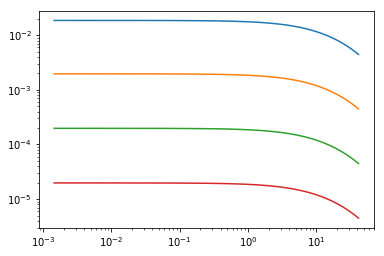

In [59]:
unitcell_dims = 1.0
beamlength = unitcell_dims/(2*np.sqrt(2))
E_mat = 1.0
rho_mat = 0 #2.0
nu_mat = 0 #0.3

offsets = np.power(10,-np.arange(1,4,0.1))
offsets = np.arange(0,np.pi/4.0,0.01)
reldens = [0.1,0.01,0.001,0.0001]
colors = ['b','y','g','r']
for i,rel_den in enumerate(reldens):
    strains = []
    output = []
    for offset in offsets:
        unit_cell_size = (np.sin(offset)+np.cos(offset))/np.sqrt(2)
        kel_nodes = np.array(gen_kel_nodes(offset))
        output.append(np.real(lattice_stiffness(kel_nodes,kelvin_frames,unit_cell_size,beamlength,rel_den)[1])[2])
        strains.append((1./unit_cell_size-1)*100)
    plt.plot(strains,output,label="p*={0}".format(rel_den))
    #plt.axhline(y=kel[2],color=colors[i])
#plt.xlim((0,0.001))
plt.xscale('log')
plt.yscale('log')
plt.show()